In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Load the dataset into python environment?

In [50]:
data = pd.read_csv(r"Downloads\titanic_dataset.csv")

In [51]:
#Here is a dataset which explains the passengers and their details of titanic ship
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 2. Make ‘PassengerId’ as the index colums

In [53]:
data.drop('PassengerId',inplace=True,axis=1)

In [54]:
#Now the PassengerId was converted into index column
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [55]:
data.describe()
#From the below data mean, standard deviation and maximum minimum values of each numerical value columns is described

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4.Fill in all the missing values present in all the columns in the dataset

In [56]:
#Search for missing values.if there is any thing which has not 0 as its number there is missing value
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [57]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

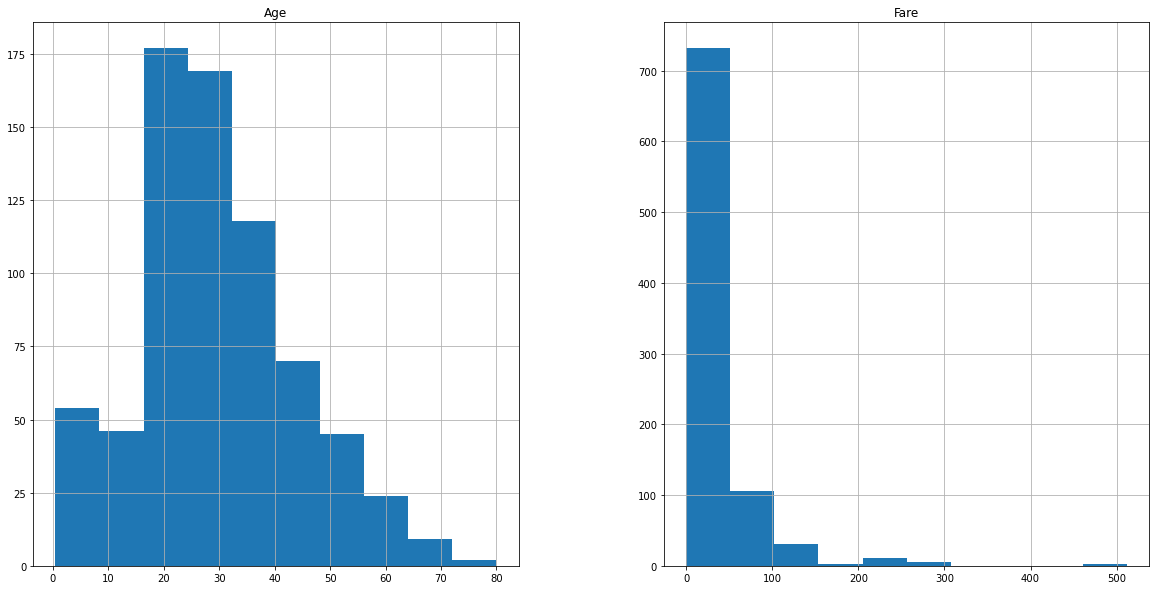

In [58]:
#If there is missing value
#data.dtypes
#Check skewness with frqgraph
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,10))
plt.show

In [59]:
#If the modal is right skewed so we can fill value by median of each column
#here in case of Age
data['Age'] = data['Age'].fillna(data['Age'].median())

In [60]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [61]:
data.Cabin.nunique()

147

In [62]:
data.Embarked.nunique()

3

In [63]:
#There are 2 columns with null values and they are categorical column so we remove them from the data set because of categorical value
data.drop('Cabin',axis = 1, inplace=True)
data.drop('Embarked',axis = 1, inplace=True)

In [16]:
data.isna().sum()
#Now there is no missing values

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

# 5.Check and handle outliers in at least 3 columns in the dataset

# 1.AGE

Text(0.5, 1.0, 'Boxplot of Age')

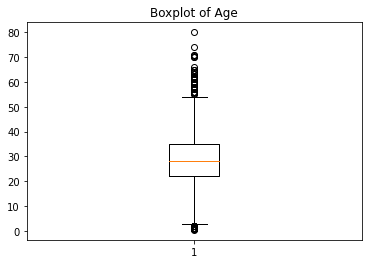

In [17]:
#In order to find outliers we can use boxplot of each column
plt.boxplot(data['Age'])
plt.title('Boxplot of Age')
#There we can find many outlilers

In [18]:
Q1 = np.percentile(data['Age'],25, interpolation = 'midpoint')
Q2 = np.percentile(data['Age'],50, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'],75, interpolation = 'midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [19]:
#Q2 will be similar with median of that column
data['Age'].median()

28.0

In [20]:
IQR = Q3-Q1
#We can find lower limit and upper limit and the we can remove those below lower limit and above upper limit

In [21]:
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR
print(low_lim)
print(upp_lim)
#So we can remove less than 2.5 and upper 54.5 so we use loop

2.5
54.5


In [22]:
outlier = []
for x in data['Age']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)

In [23]:
#There is list of those values now we need to find index
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [24]:
#Here iam taking all values greater than upper limit to index 1 and locating index values of those value from data
ind1 =  data['Age']>upp_lim
data.loc[ind1].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [25]:
data.drop([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879], inplace = True)

In [26]:
ind2 = data['Age']<low_lim
data.loc[ind2].index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [27]:
data.drop([ 7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831], inplace = True)

Text(0.5, 1.0, 'Boxplot of Age ')

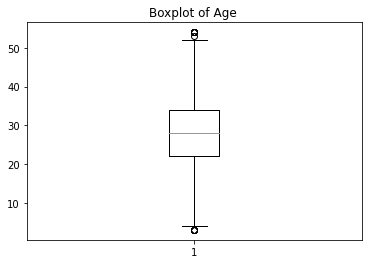

In [28]:
#So again boxplot is used to explain outliers are present or not
plt.boxplot(data['Age'])
plt.title('Boxplot of Age ')

In [29]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare'],
      dtype='object')

# P CLASS

Text(0.5, 1.0, 'Boxplot of Pclass')

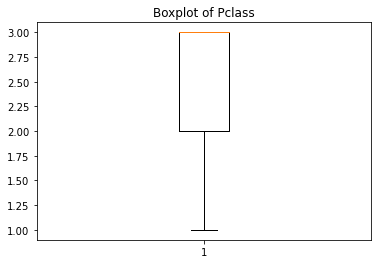

In [30]:
plt.boxplot(data['Pclass'])
plt.title('Boxplot of Pclass')
#There is no outliers present in them

# 3.FARE

Text(0.5, 1.0, 'Boxplot of Fare')

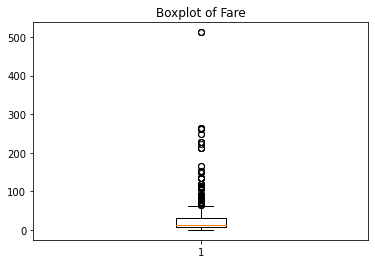

In [31]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare')

In [32]:
Q1 = np.percentile(data['Fare'],25, interpolation = 'midpoint')
Q2 = np.percentile(data['Fare'],50, interpolation = 'midpoint')
Q3 = np.percentile(data['Fare'],75, interpolation = 'midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8958
13.4167
30.0708


In [33]:
#Q2 will be similar with median of that column
data['Fare'].median()

13.4167

In [34]:
IQR = Q3-Q1

In [35]:
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR
print(low_lim)
print(upp_lim)

-25.366699999999994
63.333299999999994


In [36]:
outlier = []
for x in data['Fare']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)

In [37]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [38]:
ind1 =  data['Fare']>upp_lim
data.loc[ind1].index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88,  97,
            ...
            779, 789, 792, 802, 820, 835, 846, 849, 856, 863],
           dtype='int64', length=107)

In [39]:
data.drop([1, 27, 31, 34, 52, 61, 62, 72, 88, 97, 102, 118, 120, 124, 139, 151, 159, 180, 201, 215, 218, 224, 230, 245, 256, 257, 258, 262, 269, 290, 291, 299, 306, 307, 310, 311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 369, 373, 375, 377, 380, 385, 390, 393, 412, 435, 445, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581, 585, 591, 609, 615, 627, 641, 645, 655, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 754, 759, 763, 765, 779, 789, 792, 802, 820, 835, 846, 849, 856, 863], inplace = True)

Text(0.5, 1.0, 'Boxplot of Fare')

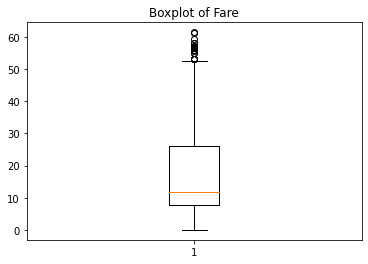

In [40]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare')

# 6.Do min max scaling on the feature set (Take ‘Survived’ as target)

In [41]:
y = data['Survived']
x = data.drop(['Survived','Name','Sex','Ticket'], axis = 1)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y, random_state=42,test_size=0.2)

In [43]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error
print("MSE is : ",mean_squared_error(y_test,prediction))

MSE is :  0.2008792395232687


In [45]:
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,prediction))

R squared value is : 0.10517037362953818


In [46]:
#Minmax scaling - Re scales a fearure or observation value with distribution value between 0 and1
#Xnew = Xi - min(x)/max(x) - min(x)
#Those selected  x is again taken
x= data.drop(['Survived','Name','Sex','Ticket'],axis = 1)
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,718.000000,718.000000,718.000000,718.000000,718.000000
mean,2.512535,28.079387,0.413649,0.317549,17.193204
std,0.715818,10.012369,0.855001,0.784792,13.244507
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.889575
50%,3.000000,28.000000,0.000000,0.000000,11.750000
75%,3.000000,32.875000,1.000000,0.000000,25.928150
max,3.000000,54.000000,5.000000,6.000000,61.379200


In [47]:
#Instance of minmax scaling to a variable
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
#Now we wil apply scaling to x and store back into x
x = min_max.fit_transform(x)

NameError: name 'preprocessing' is not defined

In [64]:
#Converted it into a numpy array so we have to covert it into a dataframe
x = pd.DataFrame(x)
x.describe()
#All columns are in specific range now we will create a LR Model and check whether any change in MSE and R squared

,Pclass,Age,SibSp,Parch,Fare
count,718.000000,718.000000,718.000000,718.000000,718.000000
mean,2.512535,28.079387,0.413649,0.317549,17.193204
std,0.715818,10.012369,0.855001,0.784792,13.244507
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.889575
50%,3.000000,28.000000,0.000000,0.000000,11.750000
75%,3.000000,32.875000,1.000000,0.000000,25.928150
max,3.000000,54.000000,5.000000,6.000000,61.379200


In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R Squared value is:',r2_score(y_test,predictions))

MSE is: 0.2008792395232687
R Squared value is: 0.10517037362953818


In [66]:
#From the above process of minmax scaling of 'Survived' column of data There is no change occured to the MSE and R squared value